In [7]:
import torch
from torch.nn import CrossEntropyLoss
from unet.unet3d import UnetModel, Trainer
# from unet3d_model.tmp import UNet
from unet.loss import DiceLoss
import numpy as np
import h5py
import os
from dataviz import view_sample, show_aneurysm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from train import *

In [8]:
x, y = load_data("../FormattedData")

In [9]:
train = "NoTrain"
if train == "New":
    model, optimizer, loss, epoch = train_main(x[:],y[:], in_channels=1, out_channels=1, learning_rate=0.01, no_epochs=10)
elif train == "NoTrain":
    model, optimizer, loss, epoch = load_model("holaBuenoDias", eval=True)
elif train == "ResumeTrain":
    model, optimizer, loss, epoch = load_model("holaBuenoDias", eval=False)
    model, optimizer, loss, epoch = resume_train(x[:],y[:], model, optimizer, loss, 0.01, 10)

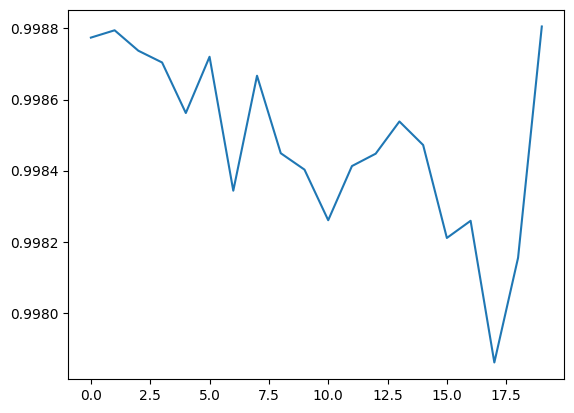

In [10]:
plt.figure()
plt.plot(np.arange(len(loss)), loss)
plt.show()

In [12]:
newY = model(torch.from_numpy(x[:1]).cuda()).cpu().detach().numpy()

z_plot,x_plot,y_plot = (newY[0,0]>0.5).nonzero()
vein_data = go.Scatter3d(
x=x_plot ,
y=y_plot, 
z=z_plot, 
marker=go.scatter3d.Marker(size=1), 
opacity=1.0, 
mode='markers')

z_plot,x_plot,y_plot = (y[0,0]>0.5).nonzero()
marker_data = go.Scatter3d(
x=x_plot,
y=y_plot, 
z=z_plot, 
marker=go.scatter3d.Marker(size=3), 
opacity=1.0, 
mode='markers')

fig=go.Figure(data=[marker_data, vein_data])
fig.show()